In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("max_info_columns", 100)

**Import Data**

In [3]:
## Code adapted from reference https://www.kaggle.com/etsc9287/food-com-eda-and-text-analysis  

df = pd.read_csv('data/RAW_recipes.csv')

In [4]:
df.shape

(231637, 12)

In [5]:
pd.set_option('display.max_colwidth', 1000)
df[['steps']].head(3).T

,0,1,2
steps,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']","['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']"


**check Missing Values and drop them if not many**

In [6]:
df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [7]:
df.dropna(inplace=True)
print(df.shape)
df.head(3)

(226657, 12)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13


**Nutritional values extraction**

In [8]:
nutrition_names = ["calories", "total_fat", "sugar", "sodium", "protein", "sat_fat", "carbs"]

In [9]:
for i, nutrition_name in enumerate(nutrition_names):
    df[nutrition_name] = df['nutrition'].map(lambda s: eval(s)[i])

In [10]:
pd.set_option('display.max_columns', 50)
print(df.shape)
df.head(3)

(226657, 19)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0


**Take a look at cooking time, the 'minutes' column**

In [11]:
# df.loc[:, ['id','name','minutes']]

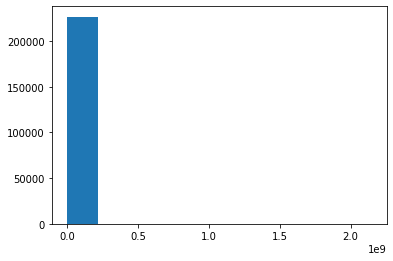

In [12]:
plt.hist(df['minutes']);  # find strange outliers 

In [13]:
df[['name','id','minutes']].groupby('minutes').sum().sort_values(by=['minutes'], ascending=False)

,id
minutes,
2147483647,261647
1051200,447963
288000,291571
259260,216215
259205,425681
...,...
4,159610521
3,288896219
2,495334749


**These columns are certainly errors, preparison of a dish cannot be that long, treat it with log scales on x-axis** 

In [14]:
df = df[df['minutes']<1_000]   # ,   use log scale...

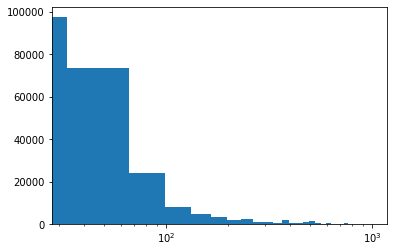

In [15]:
plt.xscale('log')
plt.hist(df['minutes'], bins=30);

(212195, 19)


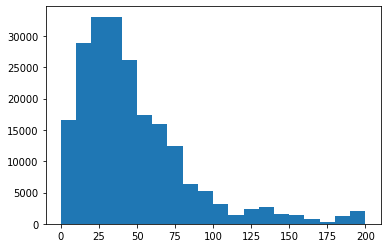

In [16]:
# Since we have enough data, let's only use cooking time < 200 minutes
df = df[df['minutes']<201] 
print(df.shape)
# plt.xscale('log')
plt.hist(df['minutes'], bins=20);

In [17]:
print(f"Amount the {df.shape[0]} recepies: ")
print()
print(f"Average cooking time: {round(df['minutes'].mean(),2)}")
print(f"Median cooking time: {df['minutes'].median()}")
print(f"Maximum cooking time: {df['minutes'].max()}")

Amount the 212195 recepies: 

Average cooking time: 44.98
Median cooking time: 35.0
Maximum cooking time: 200


**Number of Steps**

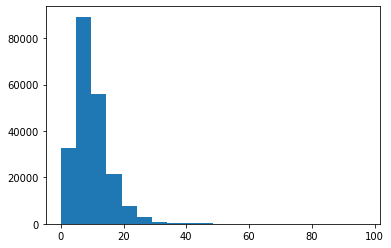

In [18]:
plt.hist(df['n_steps'], bins=20);

(208088, 19)


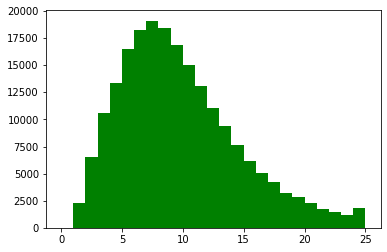

In [19]:
# Since we have enough data, let's only use number of steps <= 25
df = df[df['n_steps']<=25] 
print(df.shape)
plt.hist(df['n_steps'], bins=25, color='green');

In [20]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of cooking steps: {round(df['n_steps'].mean(),2)}")
print(f"Median number of cooking steps:: {df['n_steps'].median()}")
print(f"Maximum number of cooking steps:: {df['n_steps'].max()}")

Amount the 208088 chosen recepies: 

Average number of cooking steps: 9.25
Median number of cooking steps:: 8.0
Maximum number of cooking steps:: 25


**Number of Ingredients**

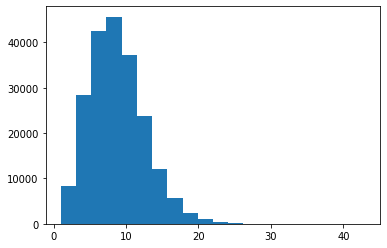

In [21]:
plt.hist(df['n_ingredients'], bins=20);

(207031, 19)


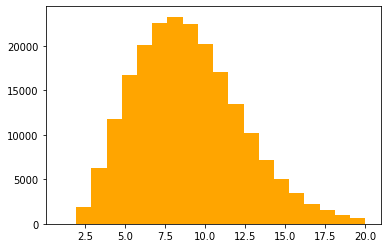

In [22]:
# Since we have enough data, let's only use number of ingredient <= 20
df = df[df['n_ingredients']<=20] 
print(df.shape)
plt.hist(df['n_ingredients'], bins=20, color='orange');

In [23]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of ingredients: {round(df['n_ingredients'].mean(),2)}")
print(f"Median number of ingredients:: {df['n_ingredients'].median()}")
print(f"Maximum number of ingredients: {df['n_ingredients'].max()}")

Amount the 207031 chosen recepies: 

Average number of ingredients: 8.85
Median number of ingredients:: 9.0
Maximum number of ingredients: 20


**Nutritional Facts**

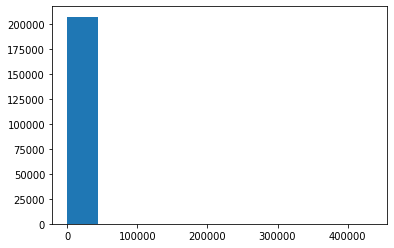

In [24]:
#Distribution of Calories
plt.hist(df['calories']);

(193249, 19)


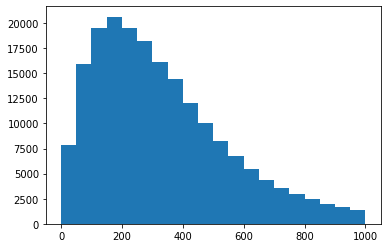

In [25]:
# Since we have enough data, let's only use number of clories <= 2_000
df = df[df['calories']<=1_000] 
print(df.shape)
plt.hist(df['calories'], bins=20);

In [26]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of calories: {round(df['calories'].mean(),2)}")
print(f"Median number of calories: {df['calories'].median()}")
print(f"Maximum number of calories: {df['calories'].max()}")

Amount the 193249 chosen recepies: 

Average number of calories: 328.5
Median number of calories: 285.6
Maximum number of calories: 1000.0


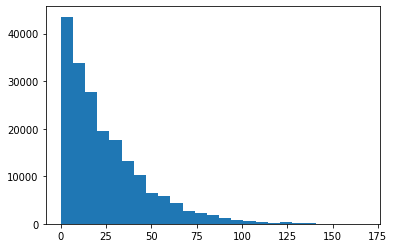

In [27]:
#Distribution of total fat
plt.hist(df['total_fat'], bins=25);

In [28]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of total_fat: {round(df['total_fat'].mean(),2)}")
print(f"Median number of total_fat: {df['total_fat'].median()}")
print(f"Maximum number of total_fat: {df['total_fat'].max()}")

Amount the 193249 chosen recepies: 

Average number of total_fat: 24.23
Median number of total_fat: 18.0
Maximum number of total_fat: 168.0


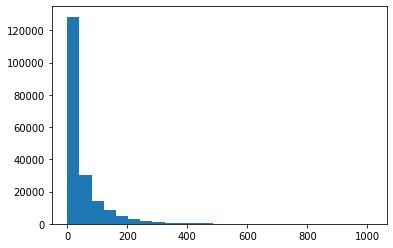

In [29]:
#Distribution of suter
plt.hist(df['sugar'], bins=25);

Amount the 192342 chosen recepies: 

Average number of sugar: 46.4
Median number of sugar: 22.0
Maximum number of sugar: 500.0


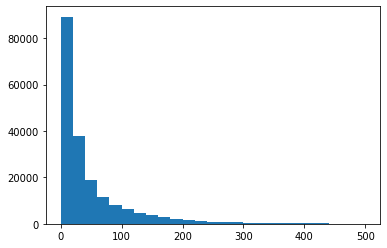

In [30]:
# Since we have enough data, let's only use number of clories <= 500
df = df[df['sugar']<=500] 
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of sugar: {round(df['sugar'].mean(),2)}")
print(f"Median number of sugar: {df['sugar'].median()}")
print(f"Maximum number of sugar: {df['sugar'].max()}")
plt.hist(df['sugar'], bins=25);

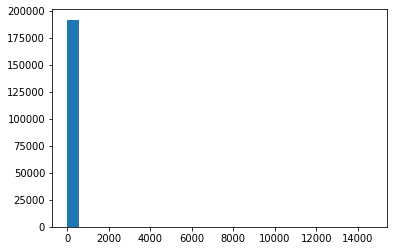

In [31]:
#Distribution of sodium
plt.hist(df['sodium'], bins=25);

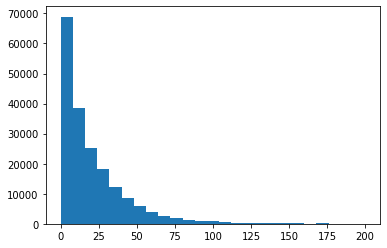

In [32]:
# Since we have enough data, let's only use sodium <= 200
df = df[df['sodium']<=200] 
plt.hist(df['sodium'], bins=25);

In [33]:
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of sodium: {round(df['sodium'].mean(),2)}")
print(f"Median number of sodium: {df['sodium'].median()}")
print(f"Maximum number of sodium: {df['sodium'].max()}")

Amount the 191481 chosen recepies: 

Average number of sodium: 20.06
Median number of sodium: 13.0
Maximum number of sodium: 200.0


Amount the 191481 chosen recepies: 

Average number of protein: 27.51
Median number of protein: 15.0
Maximum number of protein: 342.0


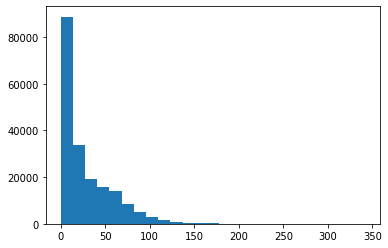

In [34]:
#Distribution of protein
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of protein: {round(df['protein'].mean(),2)}")
print(f"Median number of protein: {df['protein'].median()}")
print(f"Maximum number of protein: {df['protein'].max()}")
plt.hist(df['protein'], bins=25);

Amount the 191481 chosen recepies: 

Average number of saturated fat: 30.76
Median number of saturated fat: 20.0
Maximum number of saturated fat: 471.0


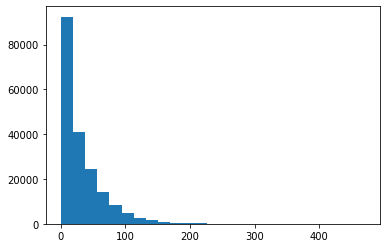

In [35]:
#Distribution of saturated fat
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of saturated fat: {round(df['sat_fat'].mean(),2)}")
print(f"Median number of saturated fat: {df['sat_fat'].median()}")
print(f"Maximum number of saturated fat: {df['sat_fat'].max()}")
plt.hist(df['sat_fat'], bins=25);

Amount the 191481 chosen recepies: 

Average number of carbohydrates: 10.06
Median number of carbohydrates: 8.0
Maximum number of carbohydrates: 82.0


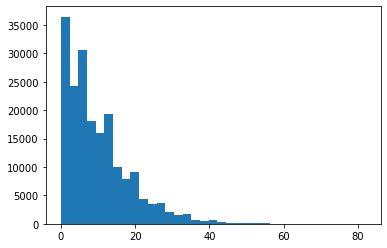

In [36]:
#Distribution of carbohydrates
print(f"Amount the {df.shape[0]} chosen recepies: ")
print()
print(f"Average number of carbohydrates: {round(df['carbs'].mean(),2)}")
print(f"Median number of carbohydrates: {df['carbs'].median()}")
print(f"Maximum number of carbohydrates: {df['carbs'].max()}")
plt.hist(df['carbs'], bins=35);

In [37]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', '

In [41]:
#Investigage the ingradient columns. check a random one..
df['ingredients'][101]

['whole wheat flour',
 'natural bran',
 'brown sugar',
 'baking soda',
 'salt',
 'cinnamon',
 'carrot',
 'raisins',
 'buttermilk',
 'corn oil',
 'egg',
 'vanilla']

In [44]:
df['ingredients'] = df['ingredients'].map(lambda s: s.strip('[').strip(']').replace("'", "").split(', '))

In [43]:
len(df['ingredients'])

191481

In [46]:
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","[winter squash, mexican seasoning, mixed spice, honey, butter, olive oil, salt]",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


In [41]:
#ingradients column is now a list of words. Save this dataframe to a new .csv file.
df.to_csv('organized_recipes.csv', index=False)